## Activity 5  - Using CSV file for STATS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Now that we loaded the libraries we needed, let's load the Boston housing data to a variable.
# Going to check the variable to make sure the csv file loaded
dataframe=pd.read_csv("BostonHousing.csv")
dataframe.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
#What's the total number of records?
dataframe.shape

(506, 14)

In [15]:
#Now we need to shave off some of the data. 
dfSmall=dataframe[['crim','zn','indus','rm','age','dis','rad', 'tax','ptratio','medv']]
dfSmall.tail(7)

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,medv
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


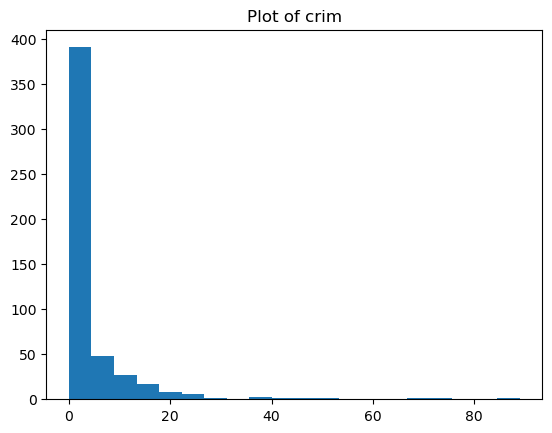

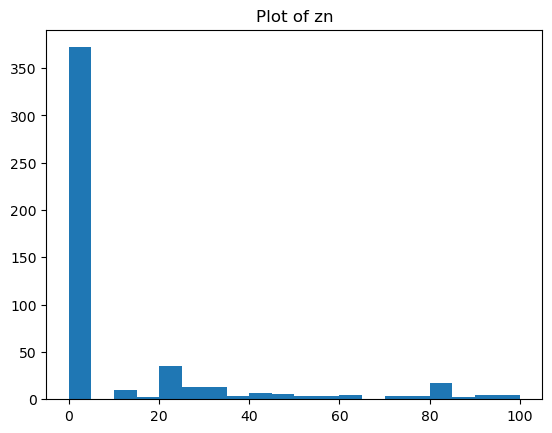

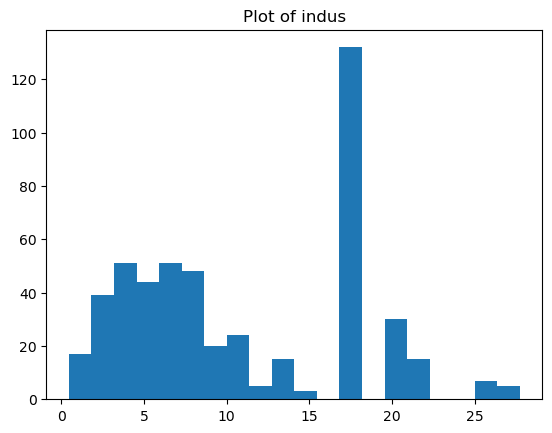

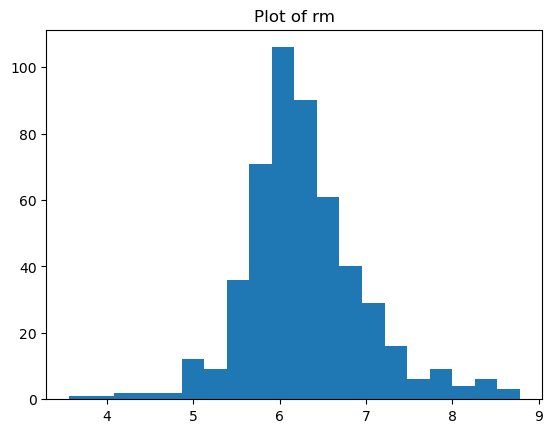

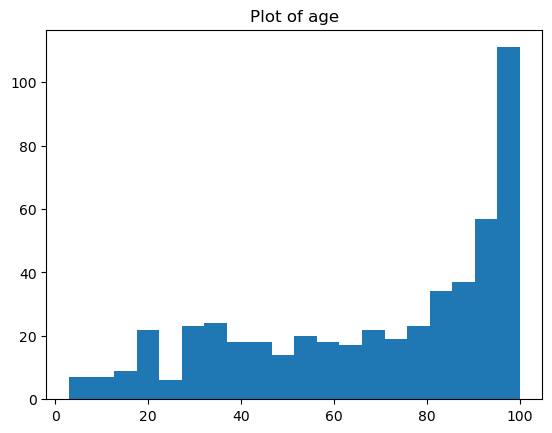

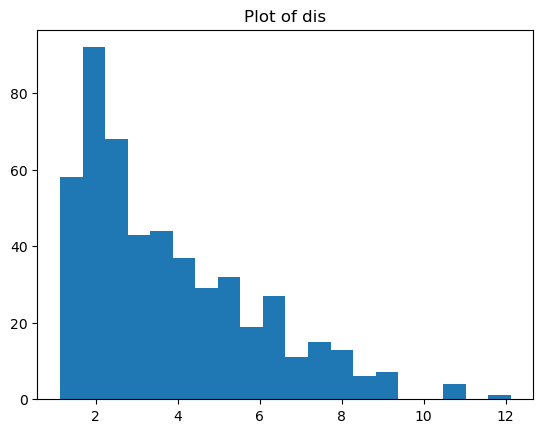

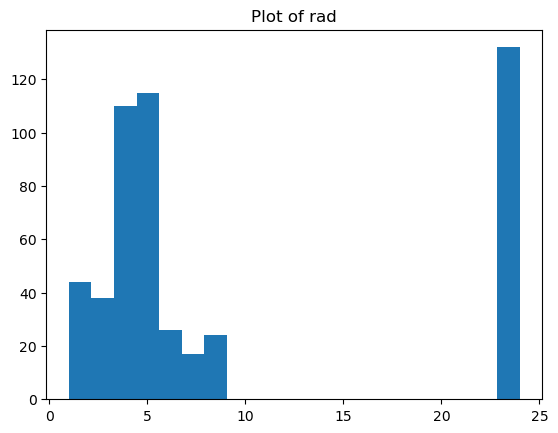

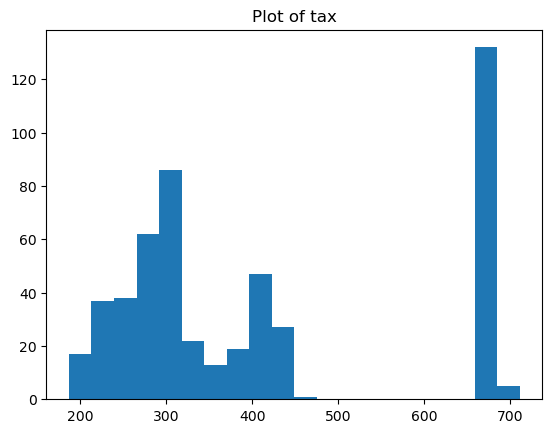

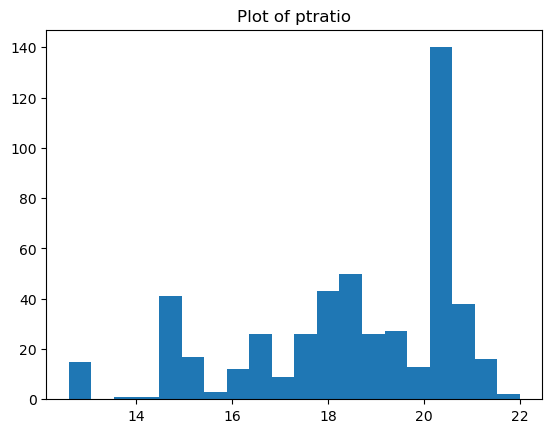

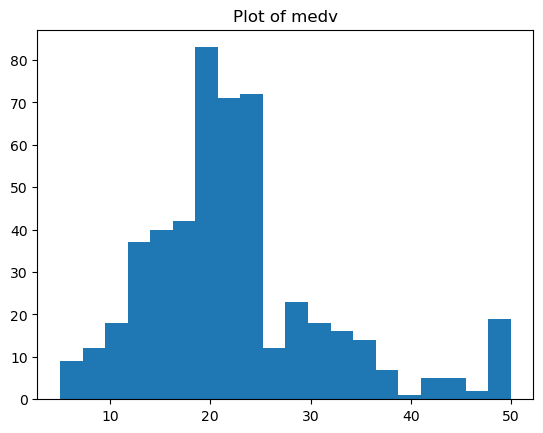

In [17]:
# Histogram loop not working- try indent
for c in dfSmall.columns:
        plt.title("Plot of "+c,fontsize=12)
        plt.hist(dfSmall[c],bins=20)
        plt.show()

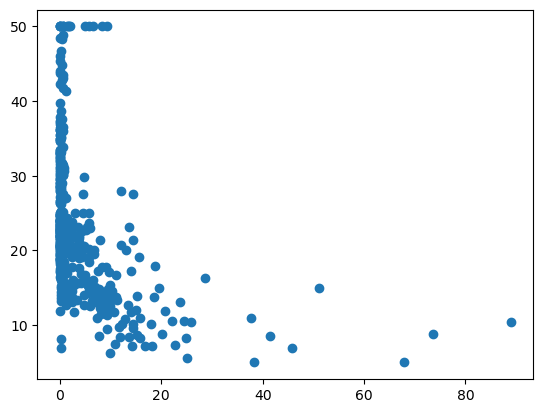

In [28]:
# Let's plot out the high crime areas

plt.scatter(dfSmall['crim'],dfSmall['medv'])
plt.show()

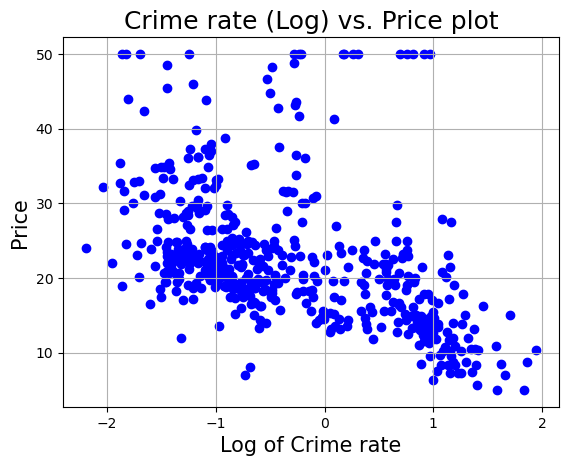

In [29]:
#Let's overlay the price and crime but using log10 this time.  
plt.scatter(np.log10(dfSmall['crim']),dfSmall['medv'],c='blue')
plt.title("Crime rate (Log) vs. Price plot", fontsize=18)
plt.xlabel("Log of Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid(True)
plt.show()


In [30]:
#mean of rooms per residence

dfSmall['rm'].mean()

6.284634387351787

In [31]:
# What is the median age of the homes?
dfSmall['age'].median()

77.5

In [32]:
# What's the average distance for those who work in nearby employment centers?

dfSmall['dis'].mean()

3.795042687747034

In [34]:
# What's the percentage of houses under $20,000
# going to import Pandas again here- not working

cheap_cost = dfSmall['medv']<20
cheap_cost.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
Name: medv, dtype: bool

In [43]:
pcnt=cheap_cost.mean()*100
pcnt2=round(pcnt)
print("\nPercentage of houses under $20K is:",pcnt2,"%")


Percentage of houses under $20K is: 42 %


## Activity 6 - Adult Income Data

In [45]:
# dump the CSV data into a variable. 

dfAdult= pd.read_csv("adult_income_data.csv")
dfAdult.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,80,United-States,>50K


In [47]:
# Need to edit the column headers- using script from book to lead headers

names = []
with open ('adult_income_names.txt', 'r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)
names.append('income')
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [48]:
# Use command to add names as headers
dfAdult= pd.read_csv("adult_income_data.csv",names=names)
dfAdult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,5178,0,40,United-States,>50K


In [50]:
# call describe command to get stat summary
dfAdult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
# Now let's do a count by class/attribute.
vars_class = ['workclass','education','marital-status','occupation','relationship','sex','native-country']

for v in vars_class:
    classes=dfAdult[v].unique()
    num_classes = dfAdult[v].nunique()
    print("There are {} classes in the \"{}\" column. They are: {}".format(num_classes,v,classes))
    print("-"*100)

There are 9 classes in the "workclass" column. They are: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------------------------------------------------
There are 16 classes in the "education" column. They are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------------------------------------------------
There are 7 classes in the "marital-status" column. They are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------------------------------------------------------------------------------------------------
There are 15 classes in the "occupation" column. They are: [' Adm-clerical' ' Exec

In [55]:
# Spot check for null values in the dataset. 
dfAdult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [56]:
# Data frame with only age, education, and occupation
df_sunset = dfAdult[['age','education','occupation']]
df_sunset.head

<bound method NDFrame.head of        age    education          occupation
0       39    Bachelors        Adm-clerical
1       50    Bachelors     Exec-managerial
2       38      HS-grad   Handlers-cleaners
3       53         11th   Handlers-cleaners
4       28    Bachelors      Prof-specialty
...    ...          ...                 ...
32556   27   Assoc-acdm        Tech-support
32557   40      HS-grad   Machine-op-inspct
32558   58      HS-grad        Adm-clerical
32559   22      HS-grad        Adm-clerical
32560   52      HS-grad     Exec-managerial

[32561 rows x 3 columns]>

<AxesSubplot:>

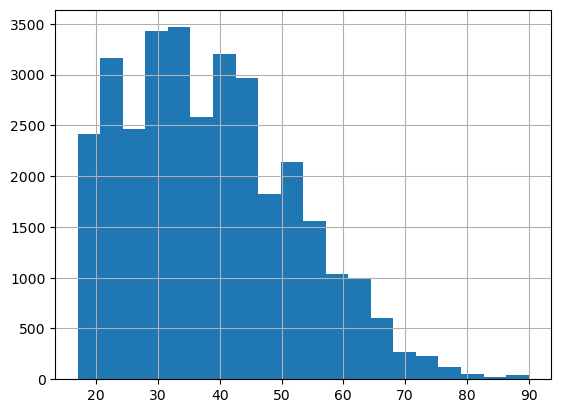

In [58]:
# Let's get a visual of sunset data
df_sunset['age'].hist(bins=20)

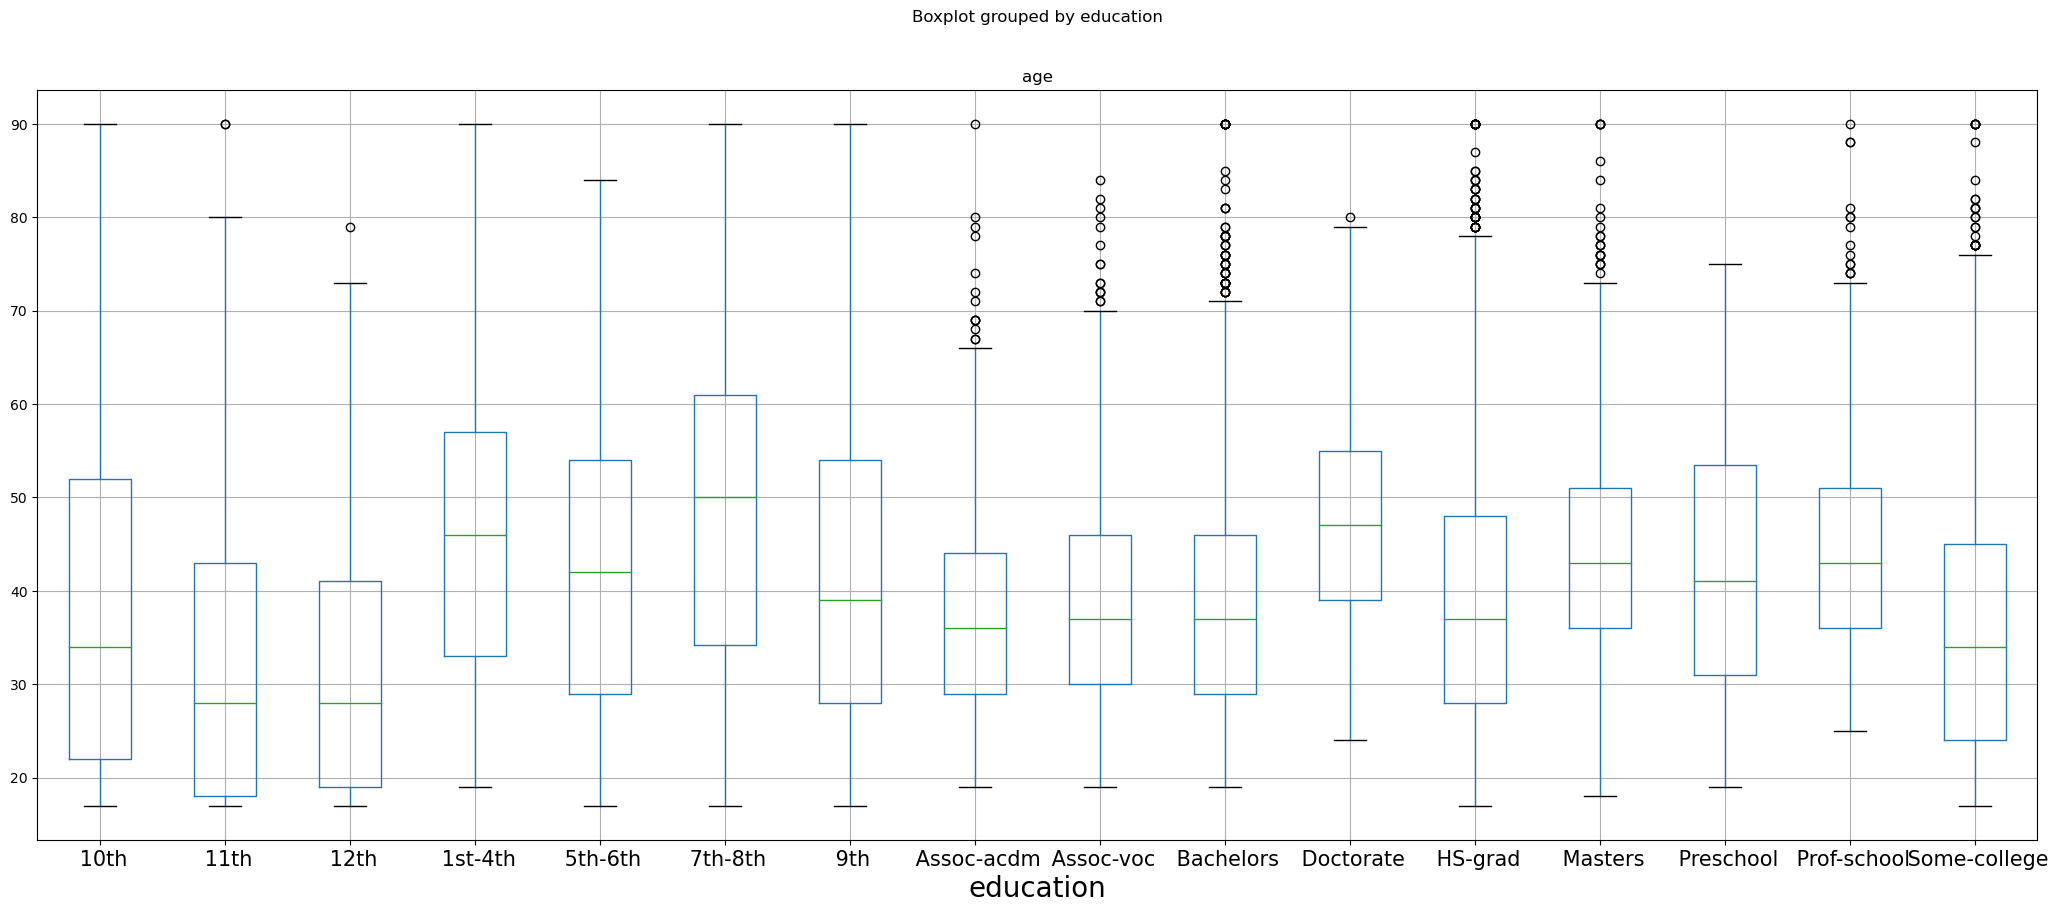

In [60]:
# Let's take a view of the age compared to education
df_sunset.boxplot(column='age', by='education', figsize=(25,10))
plt.xticks(fontsize=15)
plt.xlabel("education", fontsize=20)
plt.show()

In [61]:
# Now we need to remove whitespace

def strip_whitespace(s):
        return s.strip()

In [64]:
# let's clean up the eucation and occupation column

df_sunset['education_stripped']=dfAdult['education'].apply(strip_whitespace)
df_sunset['education']=df_sunset['education_stripped']
df_sunset.drop(labels=['education_stripped'],axis=1,inplace=True)

df_sunset['occupation_stripped']=dfAdult['occupation'].apply(strip_whitespace)
df_sunset['occupation']=df_sunset['occupation_stripped']
df_sunset.drop(labels=['occupation_stripped'],axis=1,inplace=True)


C:\Users\chris\AppData\Local\Temp\ipykernel_8108\783105350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sunset['education_stripped']=dfAdult['education'].apply(strip_whitespace)
C:\Users\chris\AppData\Local\Temp\ipykernel_8108\783105350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sunset['education']=df_sunset['education_stripped']
C:\Users\chris\AppData\Local\Temp\ipykernel_8108\783105350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [67]:
# find the number of people who are aged between 30 and 50

df_filtered=df_sunset[(df_sunset['age']>=30) & (df_sunset['age']<=50)]
df_filtered.head(10)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service
8,31,Masters,Prof-specialty
9,42,Bachelors,Exec-managerial
10,37,Some-college,Exec-managerial
11,30,Bachelors,Prof-specialty
13,32,Assoc-acdm,Sales


In [68]:
anwser_1=df_filtered.shape[0]
anwser_1

16390

In [71]:
print("There are {} people of age between 30 and 50 in this dataset.".format(anwser_1))

There are 16390 people of age between 30 and 50 in this dataset.


In [73]:
# grouping records based on occupation for the mean

df_sunset.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [76]:
# Practice removing low occupations to clean up data

occupation_stats=df_sunset.groupby('occupation').describe()['age']

TypeError: Value after * must be an iterable, not int

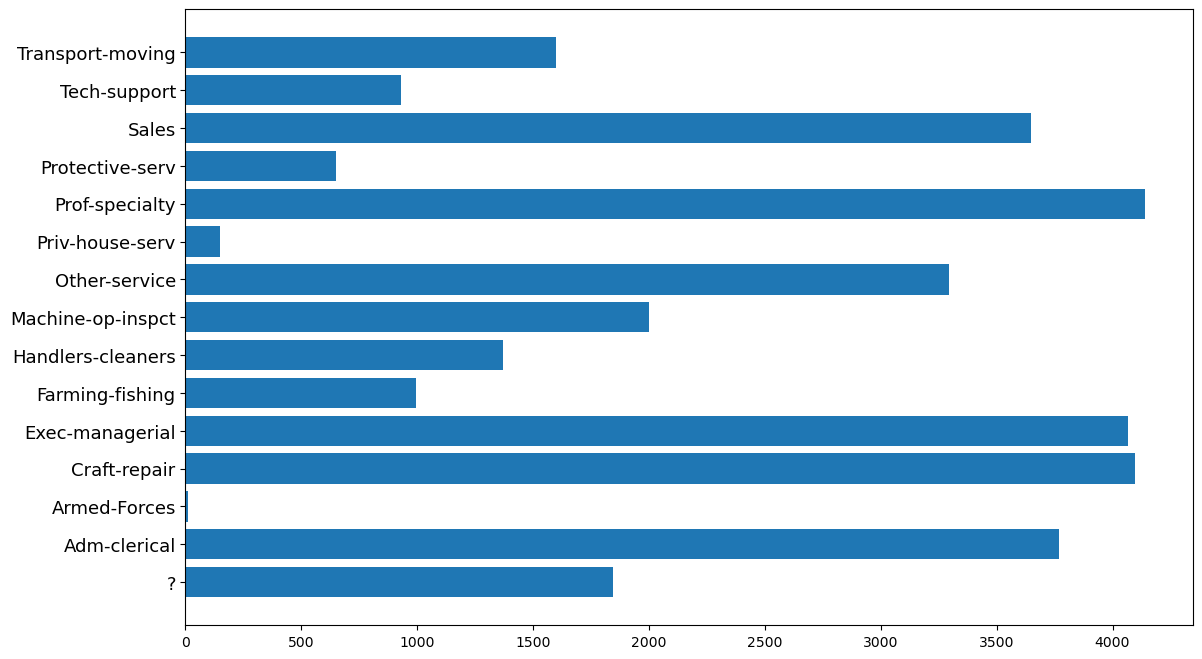

In [81]:
# Easier to see how low armed forces is with chart
plt.figure(figsize=(13,8))
plt.barh(y=occupation_stats.index, 
         width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [83]:
# Common key merging practice

df_3=dfAdult[['age',
             'workclass',
             'occupation']].sample(5,random_state=101)
df_3.head

<bound method NDFrame.head of        age workclass          occupation
22357   51   Private   Machine-op-inspct
26009   19   Private               Sales
20734   40   Private     Exec-managerial
17695   17   Private   Handlers-cleaners
27908   61   Private        Craft-repair>

In [84]:
df_4=dfAdult[['education',
             'occupation']].sample(5,random_state=101)
df_4.head

<bound method NDFrame.head of       education          occupation
22357   HS-grad   Machine-op-inspct
26009      11th               Sales
20734   HS-grad     Exec-managerial
17695      10th   Handlers-cleaners
27908   7th-8th        Craft-repair>

In [88]:
# Now let's merge
df_merged = pd.merge(df_3,df_4, on='occupation', how='inner').drop_duplicates()
df_merged

,age,workclass,occupation,education
0,51,Private,Machine-op-inspct,HS-grad
1,19,Private,Sales,11th
2,40,Private,Exec-managerial,HS-grad
3,17,Private,Handlers-cleaners,10th
4,61,Private,Craft-repair,7th-8th


## Series Practice

In [94]:
import pandas as pd

def Add_Series():

    Series_1 = [7.3, -2.5, 3.4, 1.5]
    Index_1 = ['a','c','d','e']
    Series_2 =[-2.1, 3.6, -1.5, 4, 3.1]
    Index_2 = ['a', 'c', 'e', 'f', 'g']
    s1 = pd.Series(Series_1,Index_1)
    s2 = pd.Series(Series_2,Index_2)

print("Addition of two series is:\n",s1.add(s2))

print()

print("Subtraction of two series is:\n",s1.subtract(s2))


# main function

if __name__ == "__main__":

    Add_Series()

NameError: name 's1' is not defined